In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mkdir /content/drive/MyDrive/de-reject

mkdir: cannot create directory ‘/content/drive/MyDrive/de-reject’: File exists


In [ ]:
cd /content/drive/MyDrive/de-reject/Data

/content/drive/MyDrive/de-reject/Data


In [ ]:
!unzip *.zip

Archive:  Data.zip
   creating: Data/
  inflating: Data/Assignment_Data.csv  
  inflating: Data/Delivery_Partners_Data.csv  


In [ ]:
ls

First, we load the required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import operator

Then, we extract the 2 files present in the provided zip file

In [ ]:
!unzip *.zip

Archive:  85561676e53d11eb_2.zip
   creating: dataset/
  inflating: dataset/sample_submission.csv  
  inflating: dataset/train.csv       
  inflating: dataset/test.csv        


In [ ]:
ls

Assignment_Data.csv  Delivery_Partners_Data.csv


We open the 2 datasets with pandas

In [ ]:
ad = pd.read_csv("Assignment_Data.csv")
de = pd.read_csv("Delivery_Partners_Data.csv")

In [ ]:
ad.shape

(132394, 17)

In [ ]:
de.shape

(991, 6)

The size of the datasets have been shown above. For adding more context of delivery agent details for assignment, we merge the delivery guy details to the assignment dataset on the DE_ID column to make a merged dataset.

In [ ]:
df = pd.merge(ad, de, on="DE_ID")

The numerical and categorical columns are selected

In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.tolist()

In [ ]:
cat_columns = df.select_dtypes(include=['object']).columns
cat_columns = cat_columns.tolist()

In [ ]:
cat_columns

['ASSIGNMENT_START_TIME',
 'ASSIGNMENT_END_TIME',
 'reject_type',
 'PLACED_TIME',
 'DELIVERED_TIME',
 'LAST_PING_TIME_LAST10MIN',
 'SHIFT_END_TIME',
 'DE_JOINING_DATE']

In [ ]:
numeric_columns

['ORDER_ID',
 'DE_ID',
 'reject_ind',
 'LASTMILE_DISTANCE',
 'FIRSTMILE_DISTANCE',
 'LAST_MILE_TIME_PREDICTED',
 'PAYOUT_MADE_TO_DE',
 'NUM_PING_COUNT_LAST10MIN',
 'CUSTOMER_ZONE',
 'CUSTOMER_LAT',
 'CUSTOMER_LNG',
 'DE_HOME_LAT',
 'DE_HOME_LNG',
 'DE_ZONE_ID']

In [ ]:
df.info

<bound method DataFrame.info of         ORDER_ID   DE_ID  ... DE_JOINING_DATE DE_ZONE_ID
0           2745  180976  ...      2019-10-25        373
1          14974  180976  ...      2019-10-25        373
2         115325  180976  ...      2019-10-25        373
3           1648  180976  ...      2019-10-25        373
4          72496  180976  ...      2019-10-25        373
...          ...     ...  ...             ...        ...
132389     89823  397846  ...      2020-09-18        372
132390     88708  397846  ...      2020-09-18        372
132391     89895  397846  ...      2020-09-18        372
132392     59310  339707  ...      2020-07-25        374
132393     59310  339707  ...      2020-07-25        374

[132394 rows x 22 columns]>

In [ ]:
df.shape

(132394, 22)

The means for the numerical columns are found

In [ ]:
for column in df[numeric_columns]:
    mean = df[column].mean()
    print(column, '=>', mean)

ORDER_ID => 62266.26130338233
DE_ID => 615638.894088856
reject_ind => 0.060788253244104716
LASTMILE_DISTANCE => 432.8641769398092
FIRSTMILE_DISTANCE => 364.8571212510735
LAST_MILE_TIME_PREDICTED => 403.57953834766465
PAYOUT_MADE_TO_DE => 2764.807124351353
NUM_PING_COUNT_LAST10MIN => 24.165407797936464
CUSTOMER_ZONE => 489.92653685014886
CUSTOMER_LAT => 37.38910395510759
CUSTOMER_LNG => 72.8590439996829
DE_HOME_LAT => 37.37598328629076
DE_HOME_LNG => 72.88206871033466
DE_ZONE_ID => 484.0220402737284


The modes for the categorical columns are found

In [ ]:
for column in df[cat_columns]:
    mode = df[column].mode()[0]
    print(column, '=>', mode)

ASSIGNMENT_START_TIME => 2021-03-05 03:43:22.000
ASSIGNMENT_END_TIME => 2021-03-03 03:06:20.000
reject_type => Type-1
PLACED_TIME => 2021-02-14 05:32:59.753
DELIVERED_TIME => 2021-02-14 07:35:48.000
LAST_PING_TIME_LAST10MIN => 2021-02-26 03:12:32.000
SHIFT_END_TIME => 05:42
DE_JOINING_DATE => 2020-08-09


The na rows are checked

In [ ]:
df.isna().any()

ORDER_ID                    False
DE_ID                       False
ASSIGNMENT_START_TIME       False
ASSIGNMENT_END_TIME         False
reject_ind                  False
reject_type                  True
PLACED_TIME                 False
DELIVERED_TIME               True
LASTMILE_DISTANCE            True
FIRSTMILE_DISTANCE           True
LAST_MILE_TIME_PREDICTED    False
PAYOUT_MADE_TO_DE            True
NUM_PING_COUNT_LAST10MIN    False
LAST_PING_TIME_LAST10MIN    False
CUSTOMER_ZONE                True
CUSTOMER_LAT                False
CUSTOMER_LNG                False
SHIFT_END_TIME              False
DE_HOME_LAT                 False
DE_HOME_LNG                 False
DE_JOINING_DATE             False
DE_ZONE_ID                  False
dtype: bool

In [ ]:
sum(df.isna().any())

6

In [ ]:
df.dtypes

In [ ]:
df.head()

The date, time and datetime columns are selected and datetime features are extracted according to their formats.

In [ ]:
date_cols = ["DE_JOINING_DATE"]
time_cols = ["SHIFT_END_TIME"]
# datetime_cols_nl = ["ASSIGNMENT_END_TIME", "PLACED_TIME", "DELIVERED_TIME"]
datetime_cols = ["ASSIGNMENT_START_TIME", "LAST_PING_TIME_LAST10MIN", "ASSIGNMENT_END_TIME", "PLACED_TIME", "DELIVERED_TIME"]

In [ ]:
for i in date_cols:
  df[i] = pd.to_datetime(df[i], format = '%Y-%m-%d', errors = 'coerce')

In [ ]:
for i in time_cols:
  df[i] = pd.to_datetime(df[i], format = '%H:%M', errors = 'coerce')

In [ ]:
for i in datetime_cols:
  df[i] = pd.to_datetime(df[i], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [ ]:
df

# DT column add

New columns are then formed from the datetime values of the columns

In [ ]:
date_cols = ["DE_JOINING_DATE"]
time_cols = ["SHIFT_END_TIME"]
# datetime_cols_nl = ["ASSIGNMENT_END_TIME", "PLACED_TIME", "DELIVERED_TIME"]
datetime_cols = ["ASSIGNMENT_START_TIME", "LAST_PING_TIME_LAST10MIN", "ASSIGNMENT_END_TIME", "PLACED_TIME", "DELIVERED_TIME"]

In [ ]:
for i in date_cols:
  df[i+'_year'] = df[i].dt.year
  df[i+'_month'] = df[i].dt.month
  df[i+'_day'] = df[i].dt.day
  df.pop(i)

In [ ]:
for i in time_cols:
  df[i+'_hour'] = df[i].dt.hour
  df[i+'_minute'] = df[i].dt.minute
  df.pop(i)

In [ ]:
for i in datetime_cols:
  df[i+'_year'] = df[i].dt.year
  df[i+'_month'] = df[i].dt.month
  df[i+'_day'] = df[i].dt.day
  df[i+'_hour'] = df[i].dt.hour
  df[i+'_minute'] = df[i].dt.minute
  df[i+'_second'] = df[i].dt.second
  df.pop(i)

In [ ]:
#Identify categorical and continuous variables
ID_col = ['ORDER_ID']
target_col = ["reject_ind", "reject_type"]

# New Section

In [ ]:
!pip install geopandas
!pip install geoplot

In [ ]:
!pip install imgaug==0.2.6

In [ ]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.7.1
Uninstalling Shapely-1.7.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.7.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.7.1
     |████████████████████████████████| 383 kB 28.0 MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
    Running setup.py install for shapely ... done


In [ ]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geoplot as gplt
import geoplot.crs as gcrs
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import operator

In [ ]:
test.to_csv("test.csv", index=False)

In [ ]:
cd /content/drive/MyDrive/de-reject/Data

/content/drive/MyDrive/de-reject/Data


In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
test = test[["ORDER_ID", "DE_ID", "reject_ind", "reject_type", "CUSTOMER_LAT", "CUSTOMER_LNG", "DE_HOME_LAT", "DE_HOME_LNG"]]

In [ ]:
test

,ORDER_ID,DE_ID,reject_ind,reject_type,CUSTOMER_LAT,CUSTOMER_LNG,DE_HOME_LAT,DE_HOME_LNG,geometry
0,2745,180976,0,NaN,37.377569,72.832560,37.374634,72.871986,POINT (37.37757 72.83256)
1,14974,180976,0,NaN,37.368782,72.809458,37.374634,72.871986,POINT (37.36878 72.80946)
2,115325,180976,0,NaN,37.374205,72.827956,37.374634,72.871986,POINT (37.37420 72.82796)
3,1648,180976,0,NaN,37.369154,72.815318,37.374634,72.871986,POINT (37.36915 72.81532)
4,72496,180976,0,NaN,37.376896,72.834044,37.374634,72.871986,POINT (37.37690 72.83404)
...,...,...,...,...,...,...,...,...,...
95,76783,180976,0,NaN,37.414427,72.836212,37.374634,72.871986,POINT (37.41443 72.83621)
96,83098,180976,0,NaN,37.396872,72.821195,37.374634,72.871986,POINT (37.39687 72.82119)
97,68794,180976,0,NaN,37.394621,72.851235,37.374634,72.871986,POINT (37.39462 72.85123)
98,120864,180976,0,NaN,37.405894,72.823236,37.374634,72.871986,POINT (37.40589 72.82324)


In [ ]:
coo = [Point(xy) for xy in zip(test['CUSTOMER_LAT'], test['CUSTOMER_LNG'])]
coodel = [Point(xy) for xy in zip(test['DE_HOME_LAT'], test['DE_HOME_LNG'])]

In [ ]:
gdfCustomer = gpd.GeoDataFrame(
    test, geometry=coo
)
gdfDelivery = gpd.GeoDataFrame(
    test, geometry=coodel
)

In [ ]:
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

In [ ]:
reject_ind

NameError: ignored

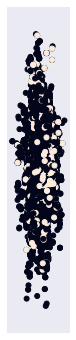

In [ ]:
ax = gplt.webmap(world[world.name == "India"], projection=gcrs.WebMercator())
gplt.pointplot(gdf, ax=ax, hue='reject_ind')

In [ ]:
ax = gplt.polyplot(world, figsize=(50, 50))
gplt.pointplot(gdf, ax=ax)

In [ ]:
plt.show()

In [ ]:
gplt.pointplot(gdf, ax=ax)

In [ ]:
world[world.name == "India"].plot(edgecolor=u'gray', color='red', ax=ax)

<Figure size 432x288 with 0 Axes>

In [ ]:


# ax = gplt.webmap(world, projection=gcrs.WebMercator())


In [ ]:
ax = gplt.webmap(world[world.continent == 'Asia'], projection=gcrs.WebMercator())
gplt.pointplot(world, ax=ax)

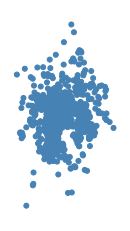

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

  # world.plot(ax=ax, color='white', edgecolor='black')
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(contiguous_usa)
gplt.pointplot(gdf, ax=ax)
# gdf.plot(ax=ax, marker='o', color='white', edgecolor='black')


In [ ]:
import geoplot.crs as gcrs

In [ ]:
%matplotlib inline
import geopandas as gpd
import geoplot as gplt

world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

In [ ]:
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

In [ ]:
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
ax = gplt.webmap(world, projection=gcrs.WebMercator())
gdf.pointplot(
    ax=ax
)

Geometry must be a Point or LineString


In [ ]:
india = world.query('continent == "India"')
ax = gplt.cartogram(
    india, scale='pop_est', limits=(0.2, 1),
    edgecolor='None', figsize=(7, 8)
)
gplt.polyplot(india, edgecolor='gray', ax=ax)